Name: Vinayak Valvi
Prediction using Unsupervised Machine Learning

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns


In [2]:
# Load the iris dataset
iris = pd.read_csv("iris.csv")

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Gives the datatype and info of the dataset.
print('Dataset Info:{}'.format(iris.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Dataset Info:None


In [8]:
#Dropping the unnecessary column
iris.drop('Id', inplace=True, axis = 1)

In [9]:
# Summary of the dataset
print('Dataset Description:\n\n{}'.format(iris.describe())) 

Dataset Description:

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
# Determining the unique values present in the dataset.
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

Visualising the data through box plot 

<AxesSubplot:xlabel='SepalLengthCm'>

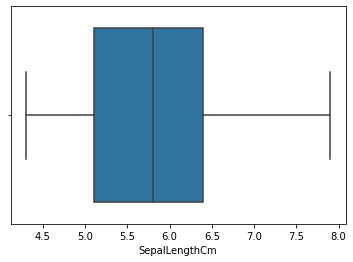

In [12]:
sns.boxplot(iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

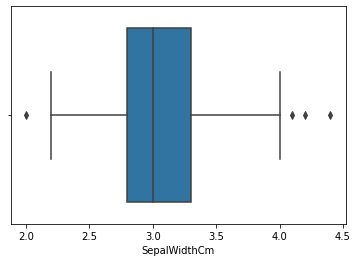

In [13]:
sns.boxplot(iris['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

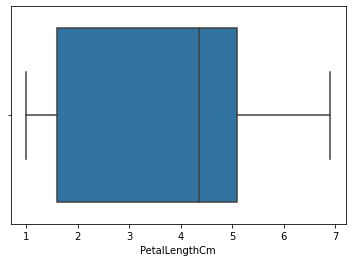

In [14]:
sns.boxplot(iris['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

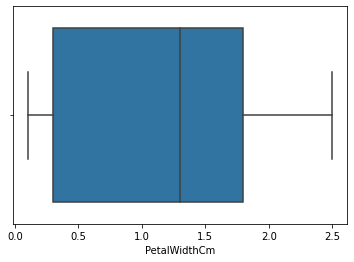

In [15]:
sns.boxplot(iris['PetalWidthCm'])

In [16]:
# Detecting the Outliers present in the dataset, if any.
def outlier_detect(iris):
    for i in iris.describe().columns:
        Q1=iris.describe().at['25%',i]
        Q3=iris.describe().at['75%',i]
        IQR= Q3-Q1
        LTV = Q1-1.5*IQR
        UTV = Q3+1.5*IQR
        iris[i]=iris[i].mask(iris[i]<LTV,LTV)
        iris[i]=iris[i].mask(iris[i]>UTV,UTV)
    return iris

In [17]:
iris=outlier_detect(iris)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
# Detecting the null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
# Carrying out the Count Analysis
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [21]:
# Determinig the correlation between the data.
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


[Text(0, 0, 'SepalLengthCm'),
 Text(0, 1, 'SepalWidthCm'),
 Text(0, 2, 'PetalLengthCm'),
 Text(0, 3, 'PetalWidthCm'),
 Text(0, 4, 'Species')]

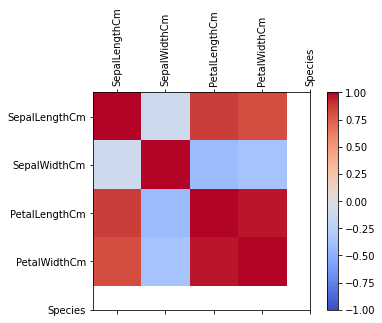

In [22]:
#This is needed for the analysis of two variables, for determining the empirical relationship between them.

iris1 = iris.corr() #finding correlation between variables of iris dataset
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(iris1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(iris.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(iris.columns)
ax.set_yticklabels(iris.columns)

<AxesSubplot:>

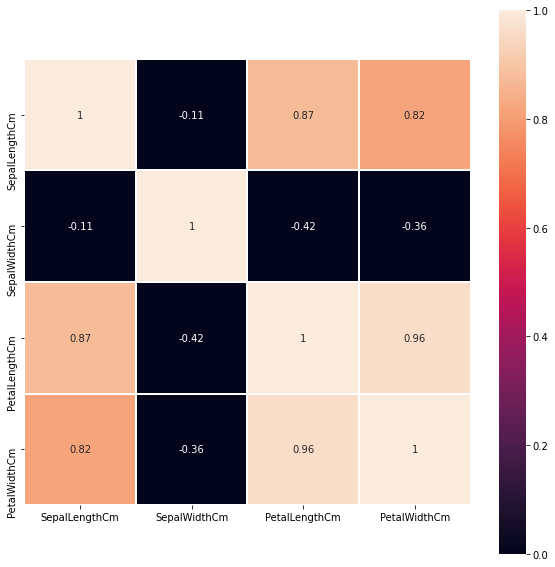

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

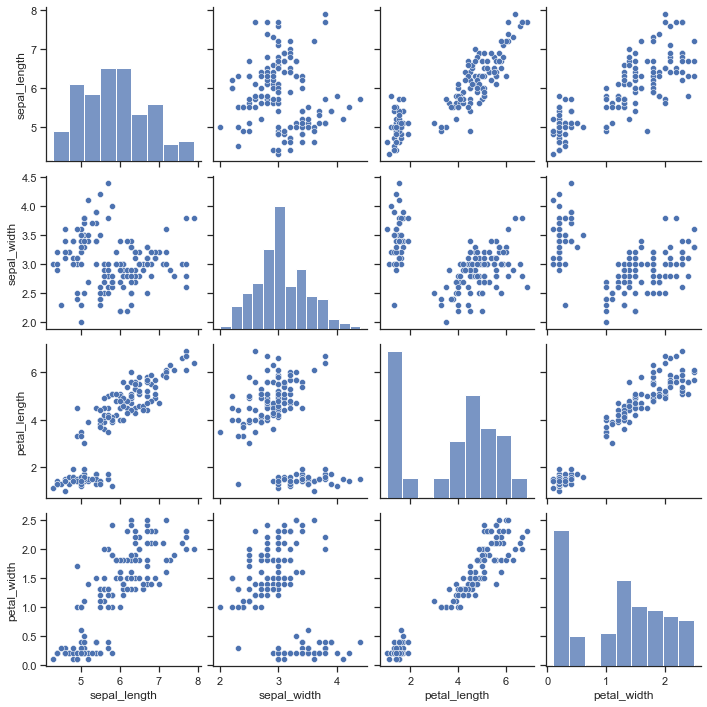

In [24]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)


import matplotlib.pyplot as plt
plt.show()

In [25]:
# Dropping the duplicate values from the data which can affect our analysis.
pd.DataFrame.drop_duplicates(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Finding the optimum number of clusters for k-means classification

In [26]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

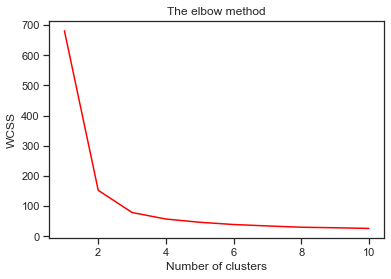

In [27]:
# Plotting the results with Elbow Plot
plt.plot(range(1, 11), wcss, color='Red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [28]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

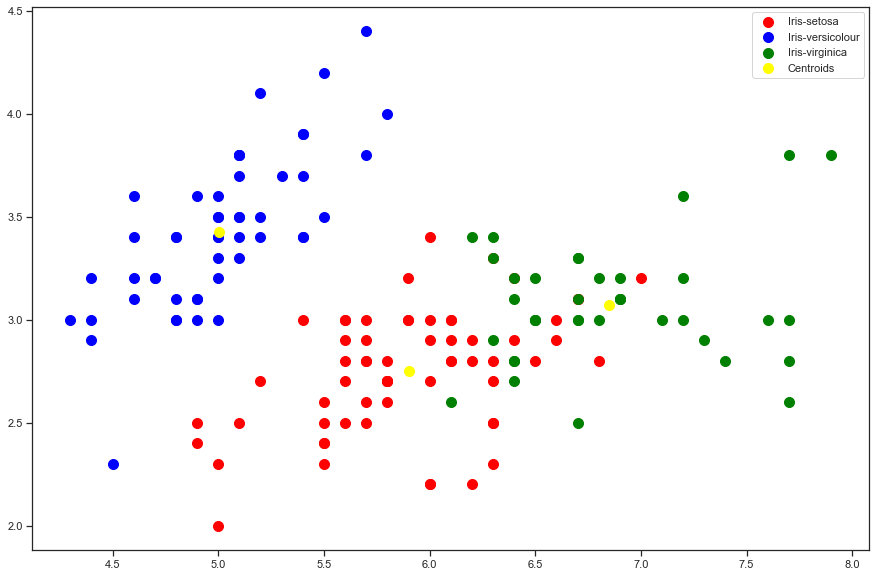

In [29]:
# Visualising the clusters 
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()